In [1]:
# import gdown
# from pyro.infer import SVI, JitTrace_ELBO, Trace_ELBO, TraceGraph_ELBO
# from pyro.optim import Adam
# import os
# import pyro
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import anndata as ad
import re
import pyro.distributions as pyrodist
import scanpy as sc
import seaborn as sns
from datetime import datetime
import time
import toolz
import torch
import torch.utils.data
import torchvision.utils as vutils
import umap
import skimage as skim
from abc import abstractmethod
from anndata.experimental.pytorch import AnnLoader
from importlib import reload
from math import pi, sin, cos, sqrt, log
import sklearn
from sklearn import datasets as skds
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import mixture
from toolz import partial, curry
from toolz import groupby, count, reduce, reduceby, countby, identity
from torch import nn, optim, distributions, Tensor
from torch.nn.functional import one_hot
from torchvision import datasets, transforms, models
from torchvision.utils import save_image, make_grid
from typing import Callable, Iterator, Union, Optional, TypeVar
from typing import List, Set, Dict, Tuple
from typing import Mapping, MutableMapping, Sequence, Iterable
from typing import Union, Any, cast, IO, TextIO
from torch.utils.data import WeightedRandomSampler
from scipy import stats
# my own sauce
from my_torch_utils import denorm, normalize, mixedGaussianCircular
from my_torch_utils import fclayer, init_weights, buildNetwork
from my_torch_utils import fnorm, replicate, logNorm, log_gaussian_prob
from my_torch_utils import plot_images, save_reconstructs, save_random_reconstructs
from my_torch_utils import scsimDataset
import my_torch_utils as ut
from importlib import reload
from torch.nn import functional as F
import gmmvae03 as M3
import gmmvae04 as M4
import gmmvae05 as M5
import gmmvae06 as M6
import gmmvae07 as M7
import gmmvae08 as M8
import gmmvae09 as M9
import gmmvae10 as M10
import gmmvae11 as M11
import gmmvae12 as M12
import gmmvae13 as M13
import gmmvae14 as M14
import gmmvae15 as M15
import gmmvae16 as M16
import gmmvaeBeta00 as Mb0
import gmmTraining as Train

print(torch.cuda.is_available())

#plt.ion()
#sc.settings.verbosity = 3
#sc.logging.print_header()
# sc.settings.set_figure_params(dpi=120, facecolor='white', )
# sc.settings.set_figure_params(figsize=(8,8), dpi=80, facecolor='white', )
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
adata = sc.read_h5ad("./data/scgen/scGen_datasets/train_study.h5ad")
bdata = sc.read_h5ad("./data/scgen/scGen_datasets/valid_study.h5ad")
adata.X = adata.X.toarray()
bdata.X = bdata.X.toarray()

In [4]:
adata.n_obs, bdata.n_obs, adata.n_vars
adata.obs
bdata.obs

cell_type   condition  mt_frac  \
index                                                                   
GACAGGGAATCTTC-1-control-0     FCGR3A+ Monocytes     control      0.0   
GTAGTGACTGACCA-1-control-0       CD14+ Monocytes     control      0.0   
CTTGATTGACTACG-1-control-0           CD4 T cells     control      0.0   
CGCAGGTGACGCTA-1-control-0     FCGR3A+ Monocytes     control      0.0   
TGGCACCTGGTAGG-1-stimulated-0  FCGR3A+ Monocytes  stimulated      0.0   
...                                          ...         ...      ...   
GATTGGACTCACGA-1-stimulated-0            B cells  stimulated      0.0   
CACAGCCTCGTAGT-1-stimulated-0        CD4 T cells  stimulated      0.0   
AGTAAGGATCTGGA-1-control-0           CD4 T cells     control      0.0   
TCGCAAGAAAACAG-1-stimulated-0        CD8 T cells  stimulated      0.0   
TTCAAAGAAGGTCT-1-control-0     FCGR3A+ Monocytes     control      0.0   

                               n_counts  n_genes  percent_mito       study  
index                                                                       
GACAGGGAATCTTC-1-control-0       4132.0     1235           NaN  Kang et al  
GTAGTGACTGACCA-1-control-0       1864.0      564           NaN  Kang et al  
CTTGATTGACTACG-1-control-0       2178.0      762           NaN  Kang et al  
CGCAGGTGACGCTA-1-control-0       1721.0      823           NaN  Kang et al  
TGGCACCTGGTAGG-1-stimulated-0    2174.0      671           NaN  Kang et al  
...                                 ...      ...           ...         ...  
GATTGGACTCACGA-1-stimulated-0    2826.0     1095           NaN  Kang et al  
CACAGCCTCGTAGT-1-stimulated-0    1095.0      525           NaN  Kang et al  
AGTAAGGATCTGGA-1-control-0       2336.0      936           NaN  Kang et al  
TCGCAAGAAAACAG-1-stimulated-0    1916.0      740           NaN  Kang et al  
TTCAAAGAAGGTCT-1-control-0       1005.0      501           NaN  Kang et al  

[2000 rows x 7 columns]

In [ ]:
cdata = sc.read_h5ad("./data/scgen/scGen_datasets/valid_pbmc.h5ad")
ddata = sc.read_h5ad("./data/scgen/scGen_datasets/train_zheng.h5ad")
cdata.X = cdata.X.toarray()
ddata.X = ddata.X.toarray()
cdata.n_obs, ddata.n_obs, cdata.n_vars, ddata.n_vars

In [8]:
cdata.obs

condition  n_counts  n_genes  mt_frac  \
index                                                                 
TGCTGAGATGCTAG-1-control        control    2528.0      841      0.0   
CAGACTGACAATCG-1-control        control    1246.0      529      0.0   
GTTGGATGCTTAGG-1-control        control    5722.0     1651      0.0   
TTCAAGCTAGCACT-1-control        control    1929.0      732      0.0   
ACCGAAACATTGGC-1-stimulated  stimulated    1096.0      529      0.0   
...                                 ...       ...      ...      ...   
GAGTGTTGCACACA-1-stimulated  stimulated    2409.0      919      0.0   
GACCTCACAGATCC-1-control        control     995.0      550      0.0   
GCGTAATGGGTAAA-1-stimulated  stimulated    1106.0      503      0.0   
TACATAGAGAAGGC-1-stimulated  stimulated    1603.0      657      0.0   
CCAGCTACCCGTTC-1-control        control    2169.0      942      0.0   

                               cell_type  
index                                     
TGCTGAGATGCTAG-1-control     FCGR3A+Mono  
CAGACTGACAATCG-1-control            CD4T  
GTTGGATGCTTAGG-1-control     FCGR3A+Mono  
TTCAAGCTAGCACT-1-control       CD14+Mono  
ACCGAAACATTGGC-1-stimulated           NK  
...                                  ...  
GAGTGTTGCACACA-1-stimulated            B  
GACCTCACAGATCC-1-control              NK  
GCGTAATGGGTAAA-1-stimulated         CD4T  
TACATAGAGAAGGC-1-stimulated         CD4T  
CCAGCTACCCGTTC-1-control               B  

[1975 rows x 5 columns]

In [9]:
ddata.obs

cell_type condition  mt_frac  n_counts  n_genes  \
index                                                                       
AAACATACAACCAC-1-1      CD4 T cells   control      NaN    2341.0      781   
AAACATTGAGCTAC-1-1          B cells   control      NaN    4710.0     1352   
AAACATTGATCAGC-1-1      CD4 T cells   control      NaN    3116.0     1131   
AAACCGTGCTTCCG-1-1  CD14+ Monocytes   control      NaN    2588.0      960   
AAACCGTGTATGCG-1-1         NK cells   control      NaN     966.0      522   
...                             ...       ...      ...       ...      ...   
TTTCGAACTCTCAT-1-1  CD14+ Monocytes   control      NaN    3381.0     1155   
TTTCTACTGAGGCA-1-1          B cells   control      NaN    3407.0     1227   
TTTCTACTTCCTCG-1-1          B cells   control      NaN    1642.0      622   
TTTGCATGAGAGGC-1-1          B cells   control      NaN     996.0      454   
TTTGCATGCCTCAC-1-1      CD4 T cells   control      NaN    1962.0      724   

                    percent_mito        study  
index                                          
AAACATACAACCAC-1-1      0.030178  Zheng et al  
AAACATTGAGCTAC-1-1      0.037936  Zheng et al  
AAACATTGATCAGC-1-1      0.008897  Zheng et al  
AAACCGTGCTTCCG-1-1      0.017431  Zheng et al  
AAACCGTGTATGCG-1-1      0.012245  Zheng et al  
...                          ...          ...  
TTTCGAACTCTCAT-1-1      0.021104  Zheng et al  
TTTCTACTGAGGCA-1-1      0.009294  Zheng et al  
TTTCTACTTCCTCG-1-1      0.021971  Zheng et al  
TTTGCATGAGAGGC-1-1      0.020548  Zheng et al  
TTTGCATGCCTCAC-1-1      0.008065  Zheng et al  

[2623 rows x 7 columns]

In [10]:
adata.n_vars,  bdata.n_vars,  cdata.n_vars,  ddata.n_vars

(7000, 7000, 6998, 7000)

In [18]:
#sc.tl.rank_genes_groups(adata, groupby="sim", method="wilcoxon")
adata.X.sum(0)
#sc.tl.rank_genes_groups?
sc.pp.neighbors(adata,)
sc.pp.pca(adata,)
sc.tl.umap(adata,)
sc.tl.louvain(adata,)

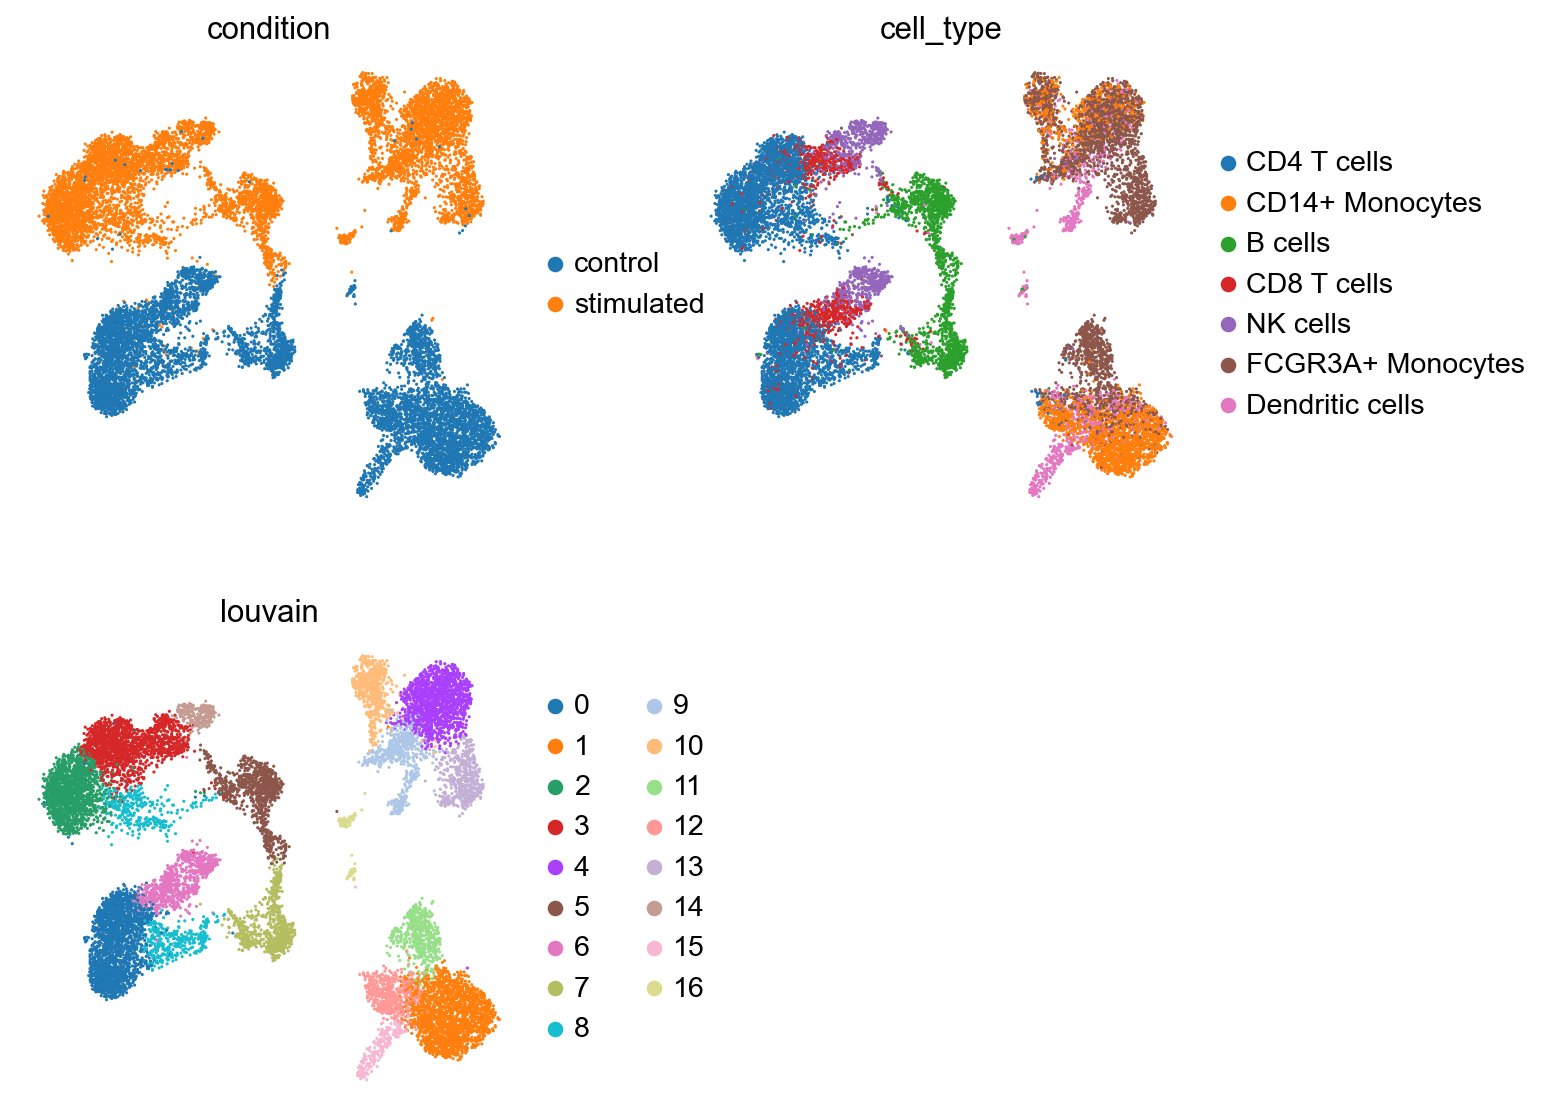

In [19]:
sc.pl.umap(
    adata,
    color=["condition",
           "cell_type",
           "louvain",
          ],
        frameon=False,
        #legend_loc='on data',
        #legend_fontsize=7,
        ncols=2,
        #color_map="magma",
        )

In [22]:
cd4Marker_d = adata.obs["cell_type"] == "CD4 T cells"
adata_cd4 = adata[cd4Marker_d].copy()
sc.tl.rank_genes_groups(adata_cd4, groupby="condition", method="wilcoxon")

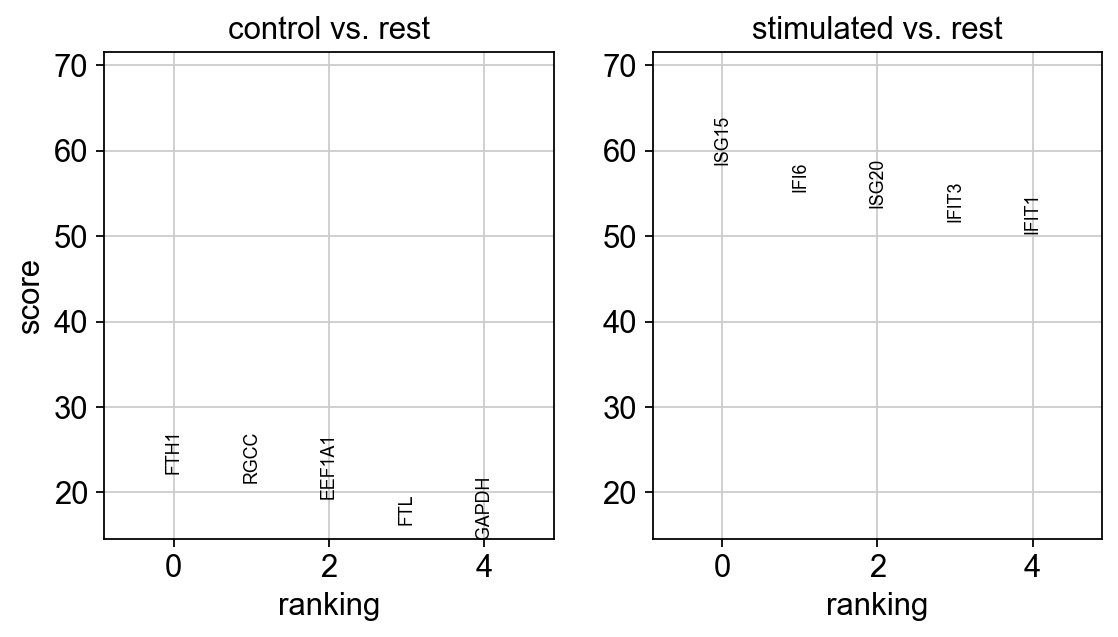

In [23]:
sc.pl.rank_genes_groups(adata_cd4, n_genes=5, cmap="viridis",)

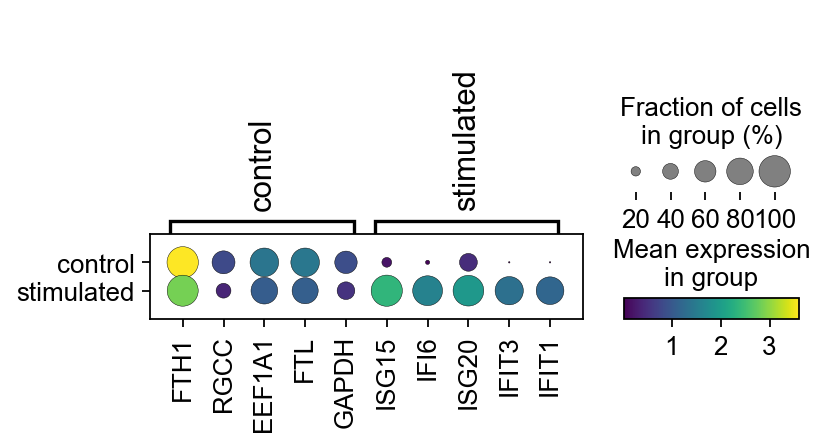

In [24]:
sc.pl.rank_genes_groups_dotplot(adata_cd4, n_genes=5, cmap="viridis",)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


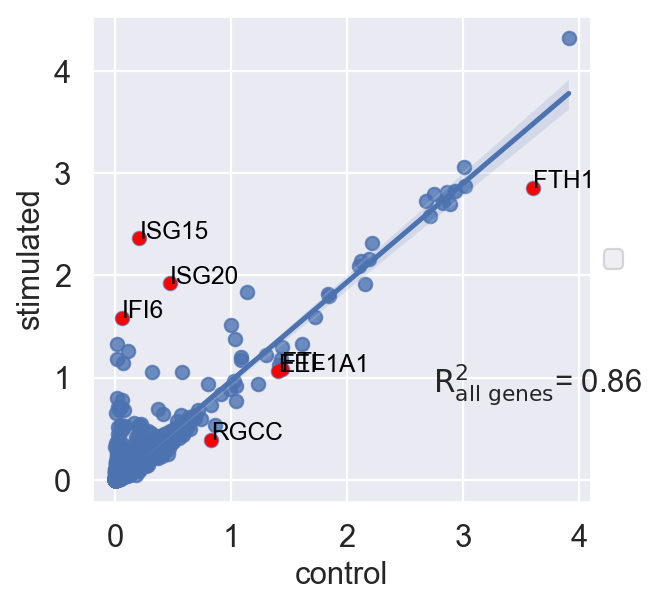

0.8641454106723353

In [27]:
ut.reg_mean_plot(adata_cd4,
                 show=True, condition_key="condition",
                 axis_keys={"y" : "stimulated", "x" : "control"},
                 labels={"y" : "stimulated", "x" : "control"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
# first 3 genes in the list are control marker, last 3 are stimulated.

In [20]:
enc_labels = LabelEncoder()
labels = enc_labels.fit_transform(adata.obs["cell_type"],)
labels = F.one_hot(torch.tensor(labels)).float()
enc_conds = LabelEncoder()
conditions = enc_conds.fit_transform(adata.obs["condition"],)
conditions = F.one_hot(torch.tensor(conditions)).float()
data = torch.tensor(adata.X)

test_enc_labels = LabelEncoder()
test_labels = test_enc_labels.fit_transform( bdata.obs["cell_type"],)
test_labels = F.one_hot(torch.tensor(test_labels)).float()
test_enc_conds = LabelEncoder()
test_conditions = test_enc_conds.fit_transform(bdata.obs["condition"],)
test_conditions = F.one_hot(torch.tensor(test_conditions)).float()
test_data = torch.tensor(bdata.X)

z_enc_labels = LabelEncoder()
z_labels = z_enc_labels.fit_transform(ddata.obs["cell_type"],)
z_labels = F.one_hot(torch.tensor(z_labels)).float()
z_enc_conds = LabelEncoder()
z_conditions = z_enc_conds.fit_transform(ddata.obs["condition"],)
#z_conditions = z_enc_conds.fit_transform(["control", "stimulated"],)
z_conditions = F.one_hot(torch.tensor(z_conditions), num_classes=2).float()
z_data = torch.tensor(ddata.X)

In [58]:
model = Mb0.AE_TypeB1500C(
    nx=adata.n_vars,
    nz=18,
    dropout=0.25,
    reclosstype="Gauss",
    nc1=2,
    learned_prior="False",
)
model = Mb0.VAE_AE_TypeB1500vC(
    nx=bdata.n_vars,
    nz=18,
    dropout=0.25,
    bn=True,
    reclosstype="mse",
    #reclosstype="Gauss",
    restrict_z=False,
    nc1=2,
    learned_prior=False,
    #learned_prior=True,
)
model.apply(init_weights)
print(model.__class__)

<class 'gmmvaeBeta00.VAE_AE_TypeB1500vC'>


In [59]:
data_loader = torch.utils.data.DataLoader(
        dataset = ut.SynteticDataSetV2(
            [
                data,
                labels,
                conditions,
                ],),
            batch_size=128,
            shuffle=True,
)

In [60]:
Train.basicTrainLoopCond(
        model,
        data_loader,
        None,
        num_epochs=35,
        report_interval=45,
        lrs = [1e-3,1e-3,1e-3,1e-4,1e-5,],
        wt=1e-4,
        #test_accuracy=True,
        )

epoch's lr =  0.001
epoch 0
training phase
rec: 1378.777099609375
loss_z: 15.044302940368652
total_loss: 1393.8214111328125

epoch's lr =  0.001
epoch 0
training phase
rec: 206.421630859375
loss_z: 5.989874839782715
total_loss: 212.4114990234375

epoch's lr =  0.001
epoch 0
training phase
rec: 204.7115020751953
loss_z: 6.023897171020508
total_loss: 210.7353973388672

epoch's lr =  0.0001
epoch 0
training phase
rec: 193.455078125
loss_z: 6.091300010681152
total_loss: 199.54637145996094

epoch's lr =  1e-05
epoch 0
training phase
rec: 207.01870727539062
loss_z: 6.083929061889648
total_loss: 213.10263061523438

done training


/home/ykolb/miniconda3/envs/torch/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'real_labels' as categorical


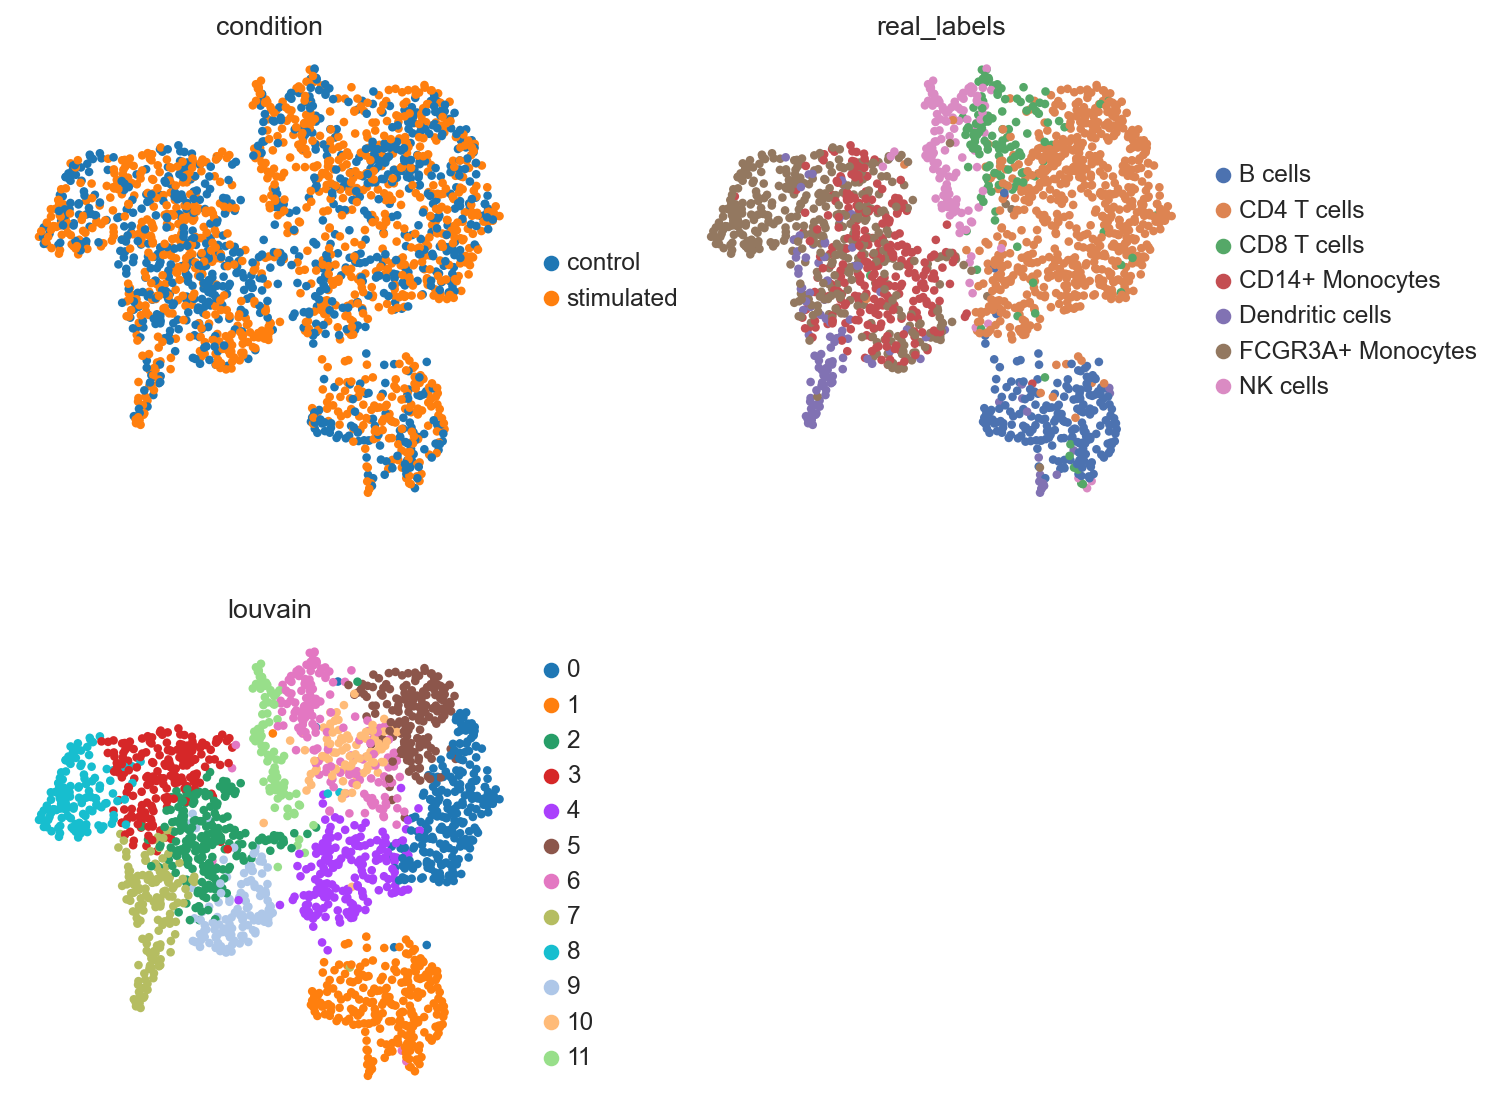

In [61]:
output = model(test_data, cond1=test_conditions )
#bdata.obsm["mu_w"] = output["mu_w"].detach().numpy()
#bdata.obsm["w"] = output["w"].detach().numpy()
#bdata.obs["predict"] = output["q_y"].detach().argmax(-1).numpy().astype(str)
#bdata.obsm["z"] = output["mu_z"].detach().numpy()
bdata.obsm["mu_z"] = output["mu_z"].detach().numpy()
bdata.obsm["z"] = output["z"].detach().numpy()
bdata.obs["real_labels"] = test_enc_labels.inverse_transform(
        test_labels.argmax(-1))
#sc.pp.neighbors(bdata,use_rep="z")
sc.pp.neighbors(bdata,use_rep="mu_z")
sc.tl.umap(bdata, )
sc.tl.louvain(bdata,)
sc.pl.umap(bdata, 
           color=[
               "condition",
               "real_labels",
               "louvain",
               #"predict",
           ], 
        frameon=False,
        #legend_loc='on data',
        #legend_fontsize=7,
        ncols=2,
        #color_map="magma",
        )

/home/ykolb/miniconda3/envs/torch/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'real_labels' as categorical


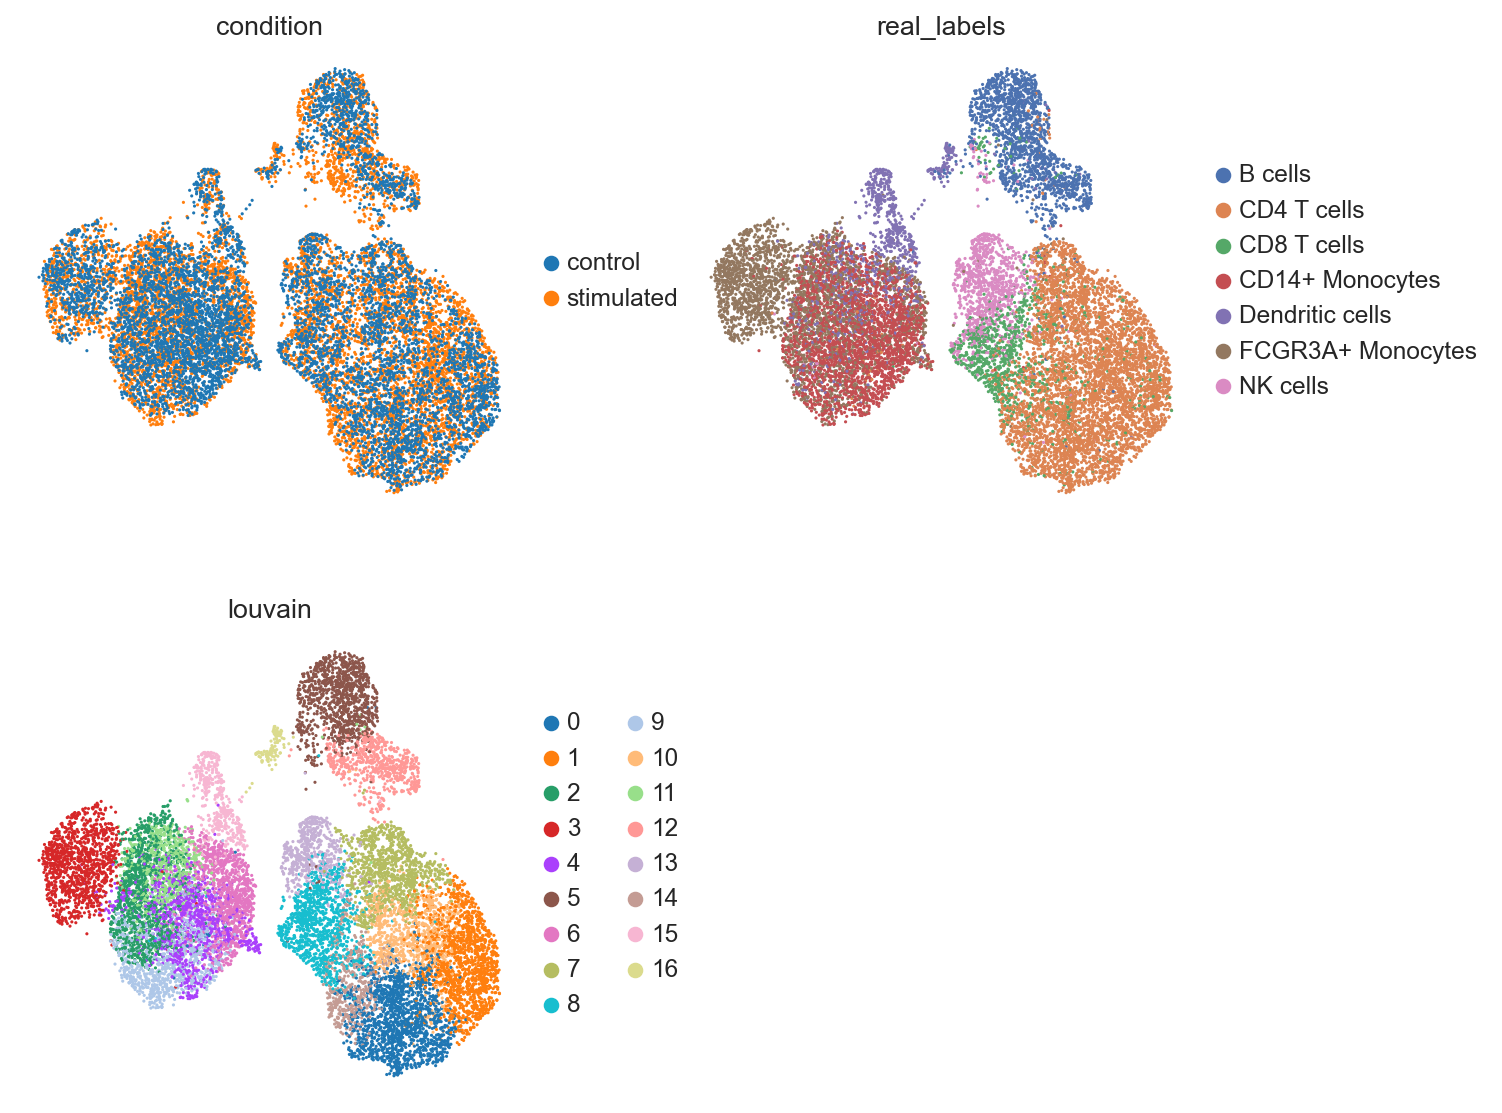

In [62]:
output = model(data, cond1=conditions )
adata.obsm["z"] = output["z"].detach().numpy()
adata.obsm["mu_z"] = output["mu_z"].detach().numpy()
adata.obs["real_labels"] = enc_labels.inverse_transform(
        labels.argmax(-1))
#sc.pp.neighbors(adata,use_rep="z")
sc.pp.neighbors(adata,use_rep="mu_z")
sc.tl.umap(adata, )
sc.tl.louvain(adata,)
sc.pl.umap(adata, 
           color=[
               "condition",
               "real_labels",
               "louvain",
               #"predict",
           ], 
        frameon=False,
        ncols=2,
        )

In [63]:
cd4Marker_d = ddata.obs["cell_type"] == "CD4 T cells"
model.cpu()
model.eval()
simOutput = model(
    input=z_data[cd4Marker_d],
    y=z_labels[cd4Marker_d],
    cond1=1-z_conditions[cd4Marker_d],
)

In [64]:
xdata = adata[adata.obs["cell_type"] == "CD4 T cells"].copy()
ydata = ddata[ddata.obs["cell_type"] == "CD4 T cells"].copy()
ydata.obs["condition"] = ["sim_stim"]*ydata.n_obs
yydata = ddata[ddata.obs["cell_type"] == "CD4 T cells"].copy()
yydata.obs["condition"] = ["ctrl_real"]*yydata.n_obs
ydata.X = simOutput['rec'].detach().abs().numpy()
ydata.obsm["z"] = simOutput["z"].detach().numpy()
#ydata.obsm["mu_z"] = simOutput["mu_z"].detach().numpy()

In [65]:
zdata = ad.concat([xdata, ydata, yydata], label="set", join="inner",)
np.unique(
    zdata.obs["condition"]
)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


array(['control', 'ctrl_real', 'sim_stim', 'stimulated'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


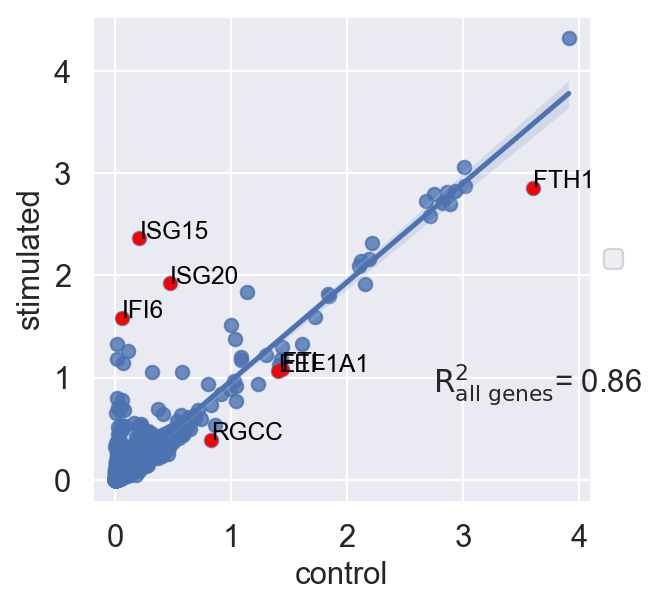

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


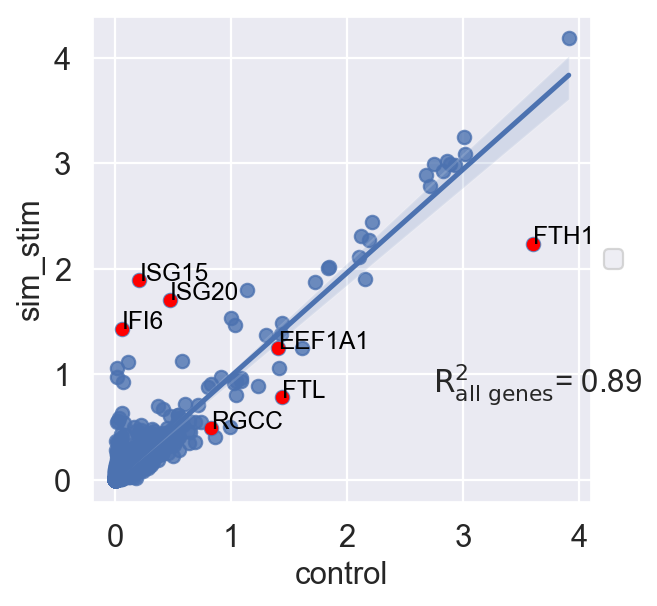

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


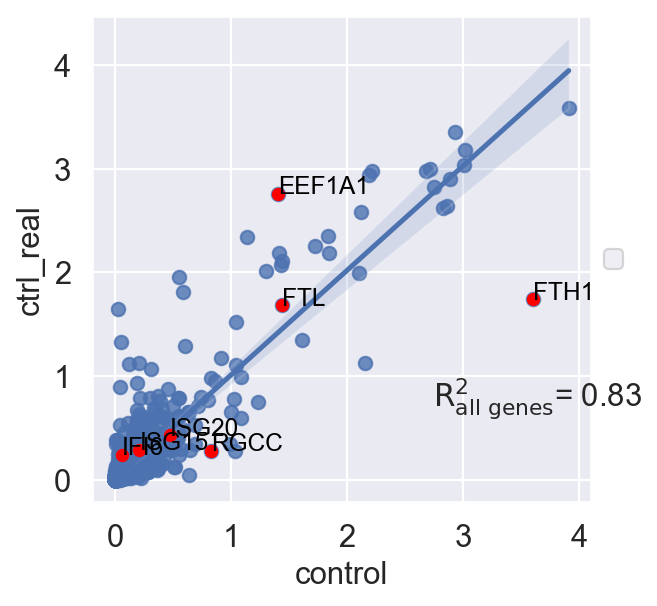

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


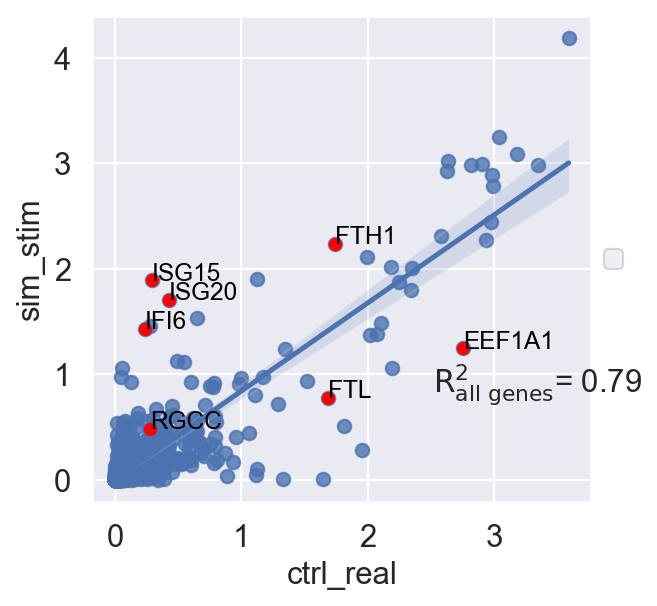

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


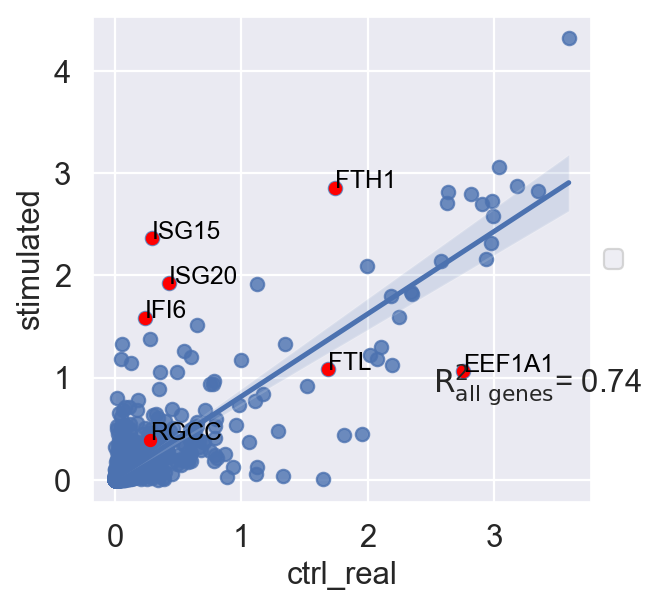

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


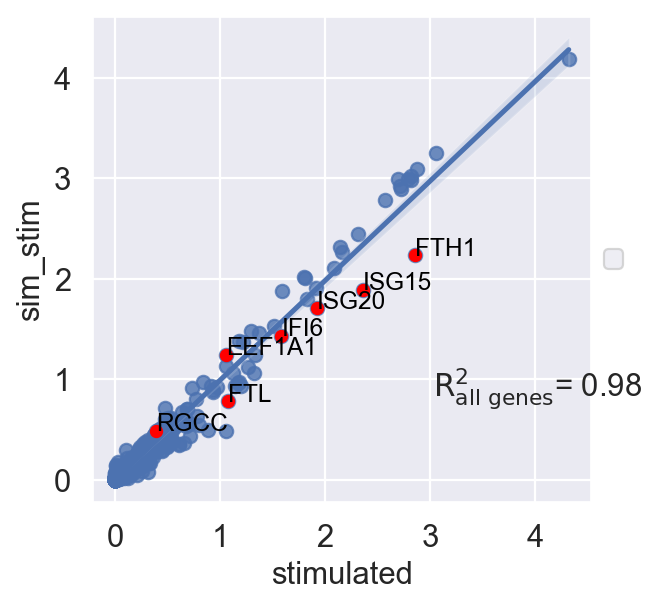

0.9780950602198878

In [66]:
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "control", "y" : "stimulated"},
                 labels={"x" : "control", "y" : "stimulated"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "control", "y" : "sim_stim"},
                 labels={"x" : "control", "y" : "sim_stim"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "control", "y" : "ctrl_real"},
                 labels={"x" : "control", "y" : "ctrl_real"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "ctrl_real", "y" : "sim_stim"},
                 labels={"x" : "ctrl_real", "y" : "sim_stim"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "ctrl_real", "y" : "stimulated"},
                 labels={"x" : "ctrl_real", "y" : "stimulated"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "stimulated", "y" : "sim_stim"},
                 labels={"x" : "stimulated", "y" : "sim_stim"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )


In [68]:
1-z_conditions[cd4Marker_d]
z_conditions[cd4Marker_d]
ddata.obs["cell_type"]

index
AAACATACAACCAC-1-1        CD4 T cells
AAACATTGAGCTAC-1-1            B cells
AAACATTGATCAGC-1-1        CD4 T cells
AAACCGTGCTTCCG-1-1    CD14+ Monocytes
AAACCGTGTATGCG-1-1           NK cells
                           ...       
TTTCGAACTCTCAT-1-1    CD14+ Monocytes
TTTCTACTGAGGCA-1-1            B cells
TTTCTACTTCCTCG-1-1            B cells
TTTGCATGAGAGGC-1-1            B cells
TTTGCATGCCTCAC-1-1        CD4 T cells
Name: cell_type, Length: 2623, dtype: category
Categories (7, object): ['CD4 T cells', 'CD14+ Monocytes', 'B cells', 'CD8 T cells', 'NK cells', 'FCGR3A+ Monocytes', 'Dendritic cells']

In [72]:
FMarker_d = ddata.obs["cell_type"] == "FCGR3A+ Monocytes"
model.cpu()
model.eval()
simOutput = model(
    input=z_data[FMarker_d],
    y=z_labels[FMarker_d],
    cond1=1-z_conditions[FMarker_d],
)
FMarker_d.sum()

150

In [73]:
xdata = adata[adata.obs["cell_type"] == "FCGR3A+ Monocytes"].copy()
ydata = ddata[ddata.obs["cell_type"] == "FCGR3A+ Monocytes"].copy()
ydata.obs["condition"] = ["sim_stim"]*ydata.n_obs
yydata = ddata[ddata.obs["cell_type"] == "FCGR3A+ Monocytes"].copy()
yydata.obs["condition"] = ["ctrl_real"]*yydata.n_obs
ydata.X = simOutput['rec'].detach().abs().numpy()
ydata.obsm["z"] = simOutput["z"].detach().numpy()
ydata.obsm["mu_z"] = simOutput["mu_z"].detach().numpy()

In [74]:
zdata = ad.concat([xdata, ydata, yydata], label="set", join="inner",)
np.unique(
    zdata.obs["condition"]
)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


array(['control', 'ctrl_real', 'sim_stim', 'stimulated'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


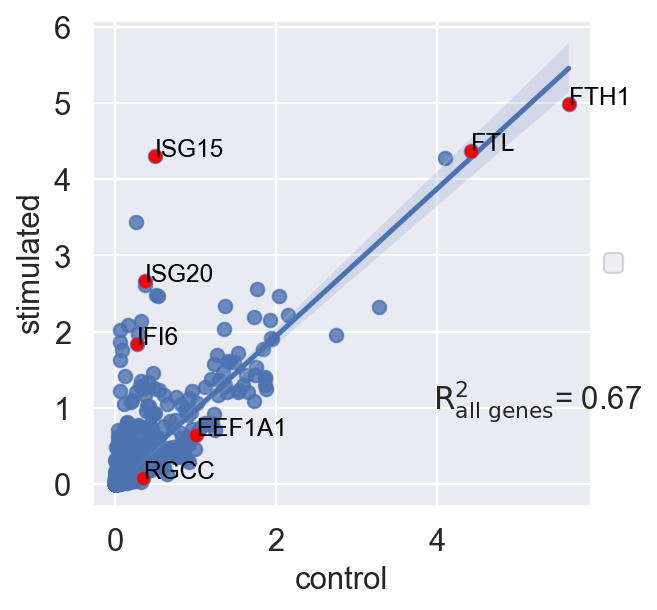

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


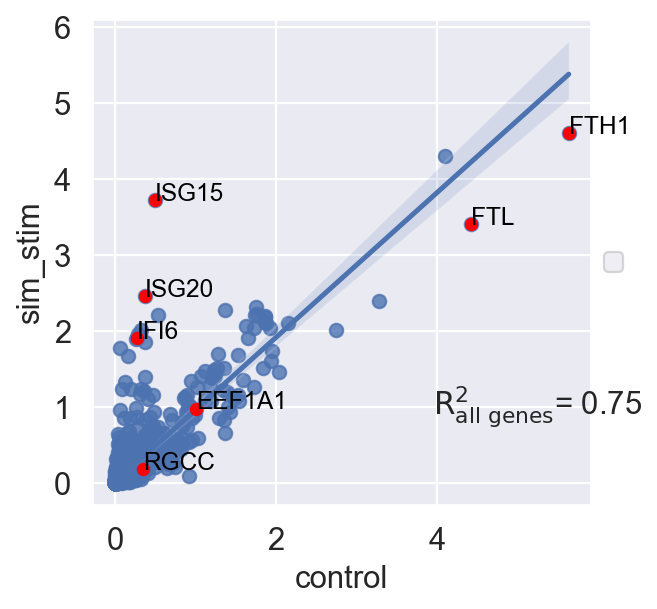

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


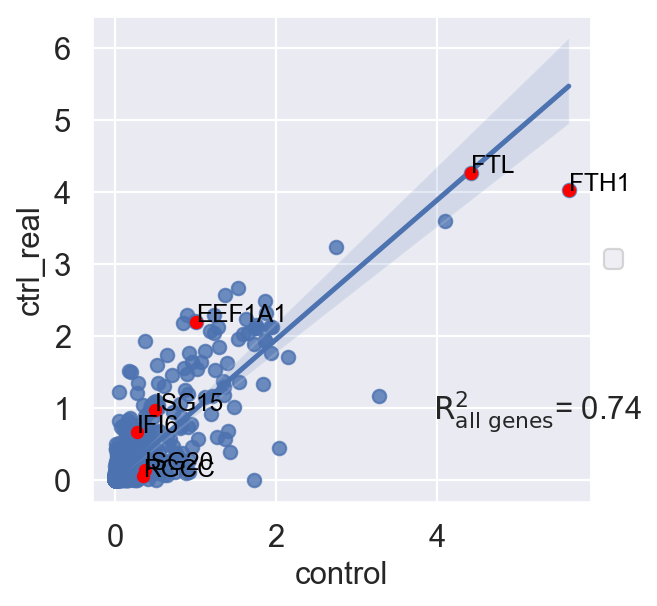

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


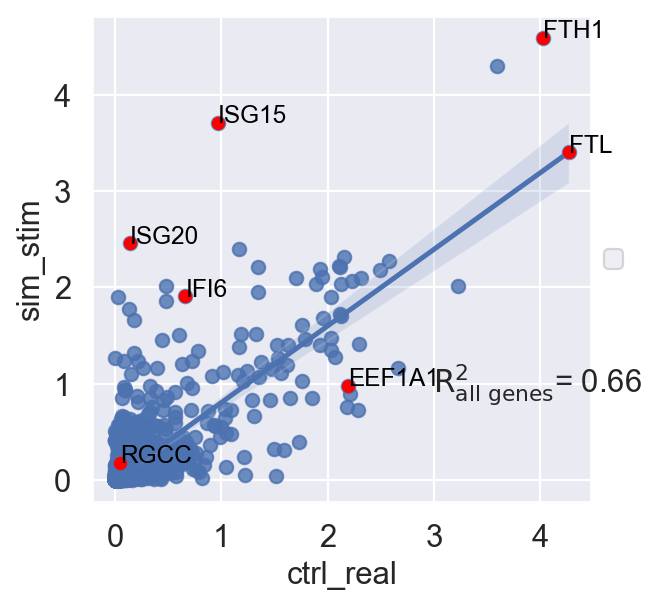

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


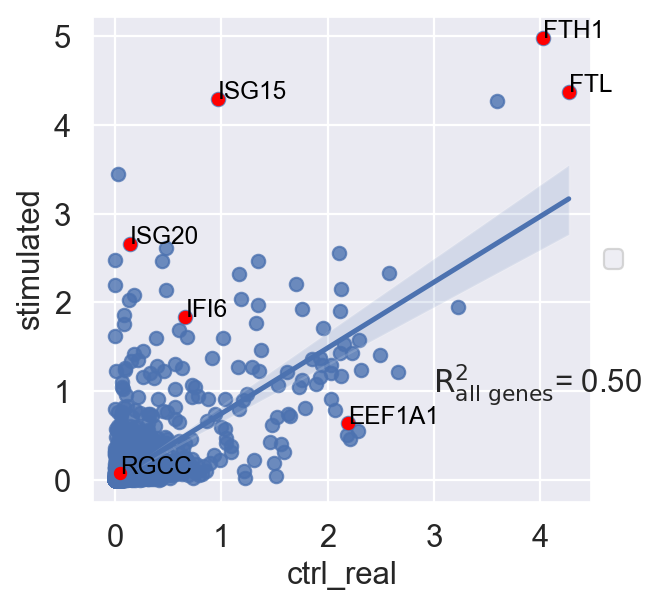

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


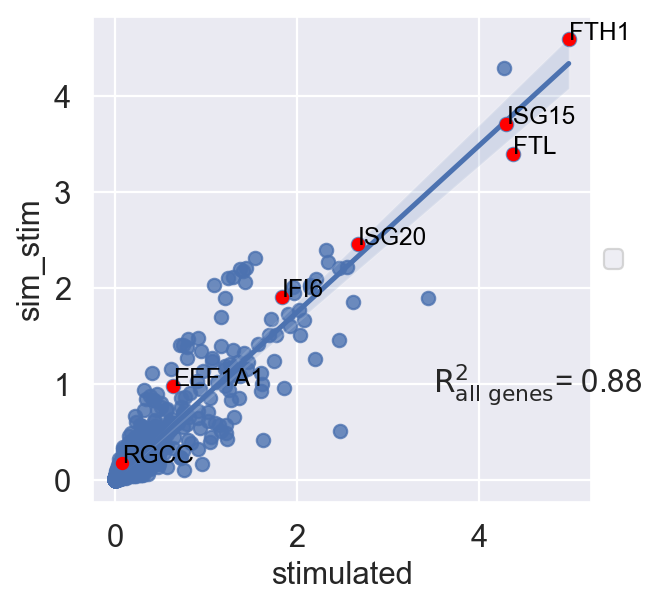

0.8750196916934824

In [75]:
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "control", "y" : "stimulated"},
                 labels={"x" : "control", "y" : "stimulated"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "control", "y" : "sim_stim"},
                 labels={"x" : "control", "y" : "sim_stim"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "control", "y" : "ctrl_real"},
                 labels={"x" : "control", "y" : "ctrl_real"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "ctrl_real", "y" : "sim_stim"},
                 labels={"x" : "ctrl_real", "y" : "sim_stim"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "ctrl_real", "y" : "stimulated"},
                 labels={"x" : "ctrl_real", "y" : "stimulated"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "stimulated", "y" : "sim_stim"},
                 labels={"x" : "stimulated", "y" : "sim_stim"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )

In [82]:
ut.saveModelParameters(
        model,
        "./results/Kang_cvae_" + ut.timeStamp() + "_model_params.pt",
        method="json",
        )
torch.save(
        model.state_dict(),
        "./results/Kang_cvae_" + ut.timeStamp() + "_model_state.pt",
        )


In [83]:
# now repeat with different model
#model = Mb0.AE_TypeB1500C(
#    nx=adata.n_vars,
#    nz=18,
#    dropout=0.25,
#    reclosstype="Gauss",
#    nc1=2,
#    learned_prior="False",
#)
#model = Mb0.VAE_AE_TypeB1500vC(
#    nx=bdata.n_vars,
#    nz=18,
#    dropout=0.25,
#    bn=True,
#    reclosstype="mse",
#    #reclosstype="Gauss",
#    restrict_z=False,
#    nc1=2,
#    learned_prior=False,
#    #learned_prior=True,
#)
model = Mb0.VAE_TypeB1601C(
    nx=bdata.n_vars,
    nz=18,
    nw=18,
    dropout=0.25,
    bn=True,
    reclosstype="mse",
    #reclosstype="Gauss",
    restrict_z=False,
    nc1=2,
    learned_prior=False,
    #learned_prior=True,
)
model.apply(init_weights)
print(model.__class__)

<class 'gmmvaeBeta00.VAE_TypeB1601C'>


In [84]:
Train.basicTrainLoopCond(
        model,
        data_loader,
        None,
        num_epochs=35,
        report_interval=45,
        lrs = [1e-3,1e-3,1e-3,1e-4,1e-5,],
        wt=1e-4,
        #test_accuracy=True,
        )

epoch's lr =  0.001
epoch 0
training phase
rec: 1347.537109375
loss_z: 62.05632019042969
loss_w: 13.680272102355957
total_loss: 1423.273681640625

epoch's lr =  0.001
epoch 0
training phase
rec: 206.07778930664062
loss_z: 3.4071645736694336
loss_w: 1.4319697618484497
total_loss: 210.91693115234375

epoch's lr =  0.001
epoch 0
training phase
rec: 213.77569580078125
loss_z: 4.096370697021484
loss_w: 1.3968113660812378
total_loss: 219.2688751220703

epoch's lr =  0.0001
epoch 0
training phase
rec: 209.57656860351562
loss_z: 4.0118608474731445
loss_w: 1.4130377769470215
total_loss: 215.00146484375

epoch's lr =  1e-05
epoch 0
training phase
rec: 201.86041259765625
loss_z: 4.185244083404541
loss_w: 1.4167625904083252
total_loss: 207.46241760253906

done training


/home/ykolb/miniconda3/envs/torch/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'real_labels' as categorical


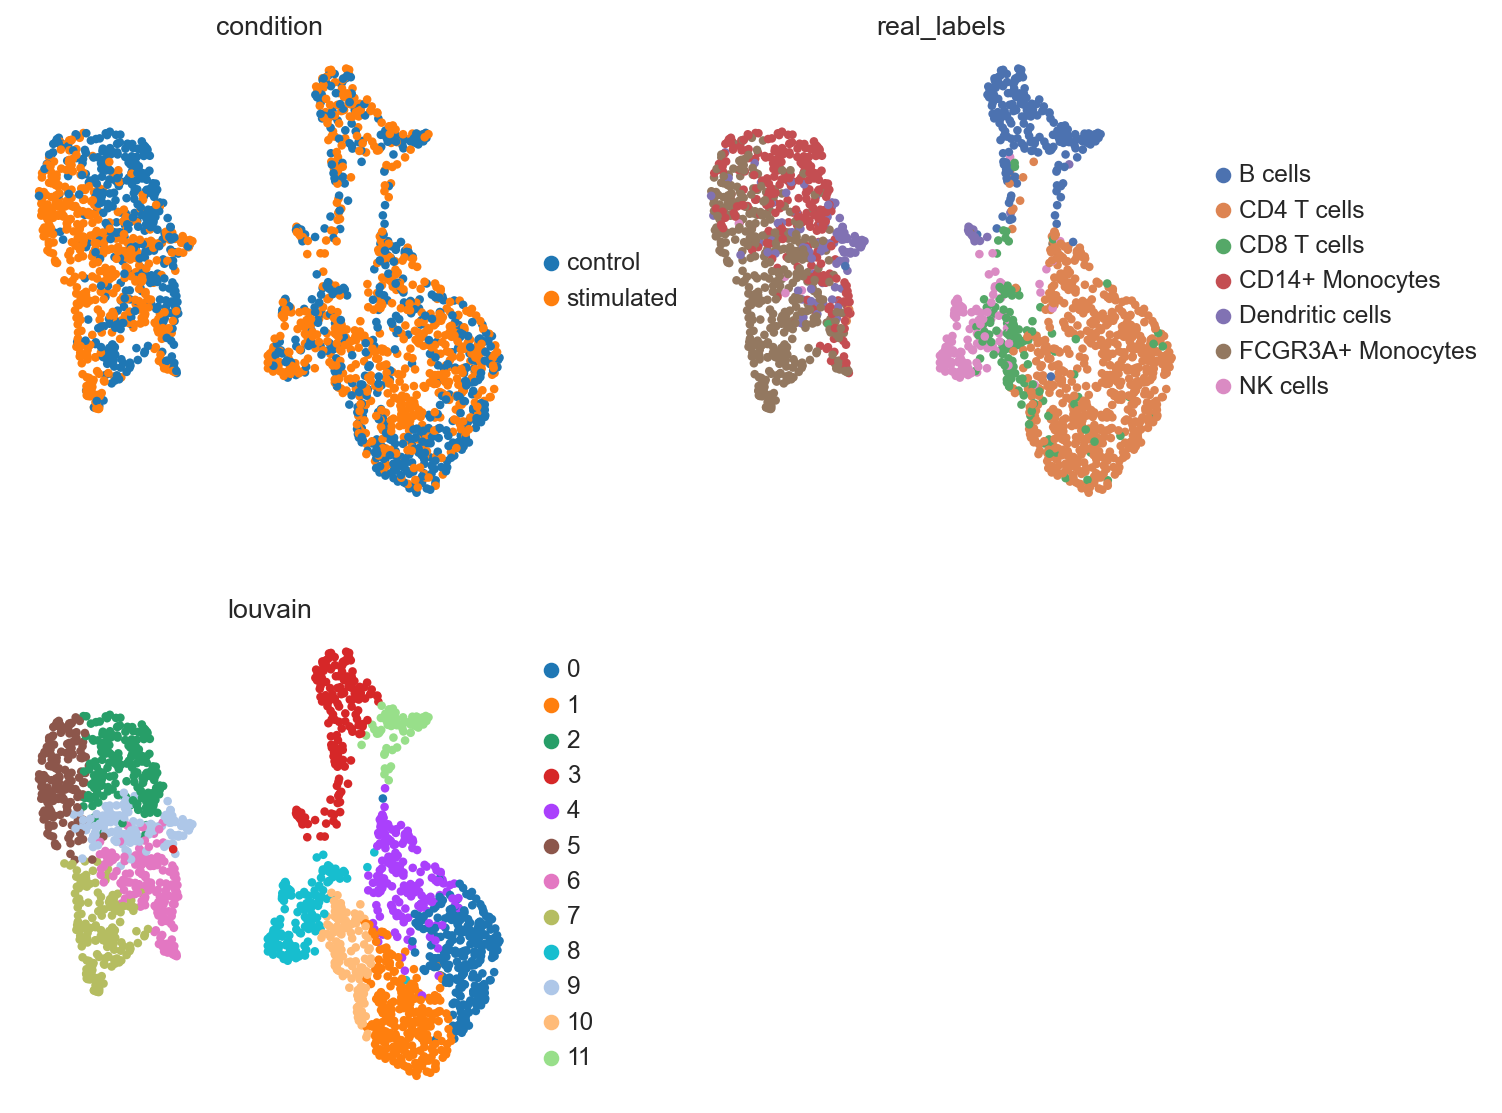

In [85]:
output = model(test_data, cond1=test_conditions )
bdata.obsm["mu_w"] = output["mu_w"].detach().numpy()
bdata.obsm["w"] = output["w"].detach().numpy()
#bdata.obs["predict"] = output["q_y"].detach().argmax(-1).numpy().astype(str)
#bdata.obsm["z"] = output["mu_z"].detach().numpy()
bdata.obsm["mu_z"] = output["mu_z"].detach().numpy()
bdata.obsm["z"] = output["z"].detach().numpy()
bdata.obs["real_labels"] = test_enc_labels.inverse_transform(
        test_labels.argmax(-1))
#sc.pp.neighbors(bdata,use_rep="z")
sc.pp.neighbors(bdata,use_rep="mu_z")
sc.tl.umap(bdata, )
sc.tl.louvain(bdata,)
sc.pl.umap(bdata, 
           color=[
               "condition",
               "real_labels",
               "louvain",
               #"predict",
           ], 
        frameon=False,
        #legend_loc='on data',
        #legend_fontsize=7,
        ncols=2,
        #color_map="magma",
        )

/home/ykolb/miniconda3/envs/torch/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'real_labels' as categorical


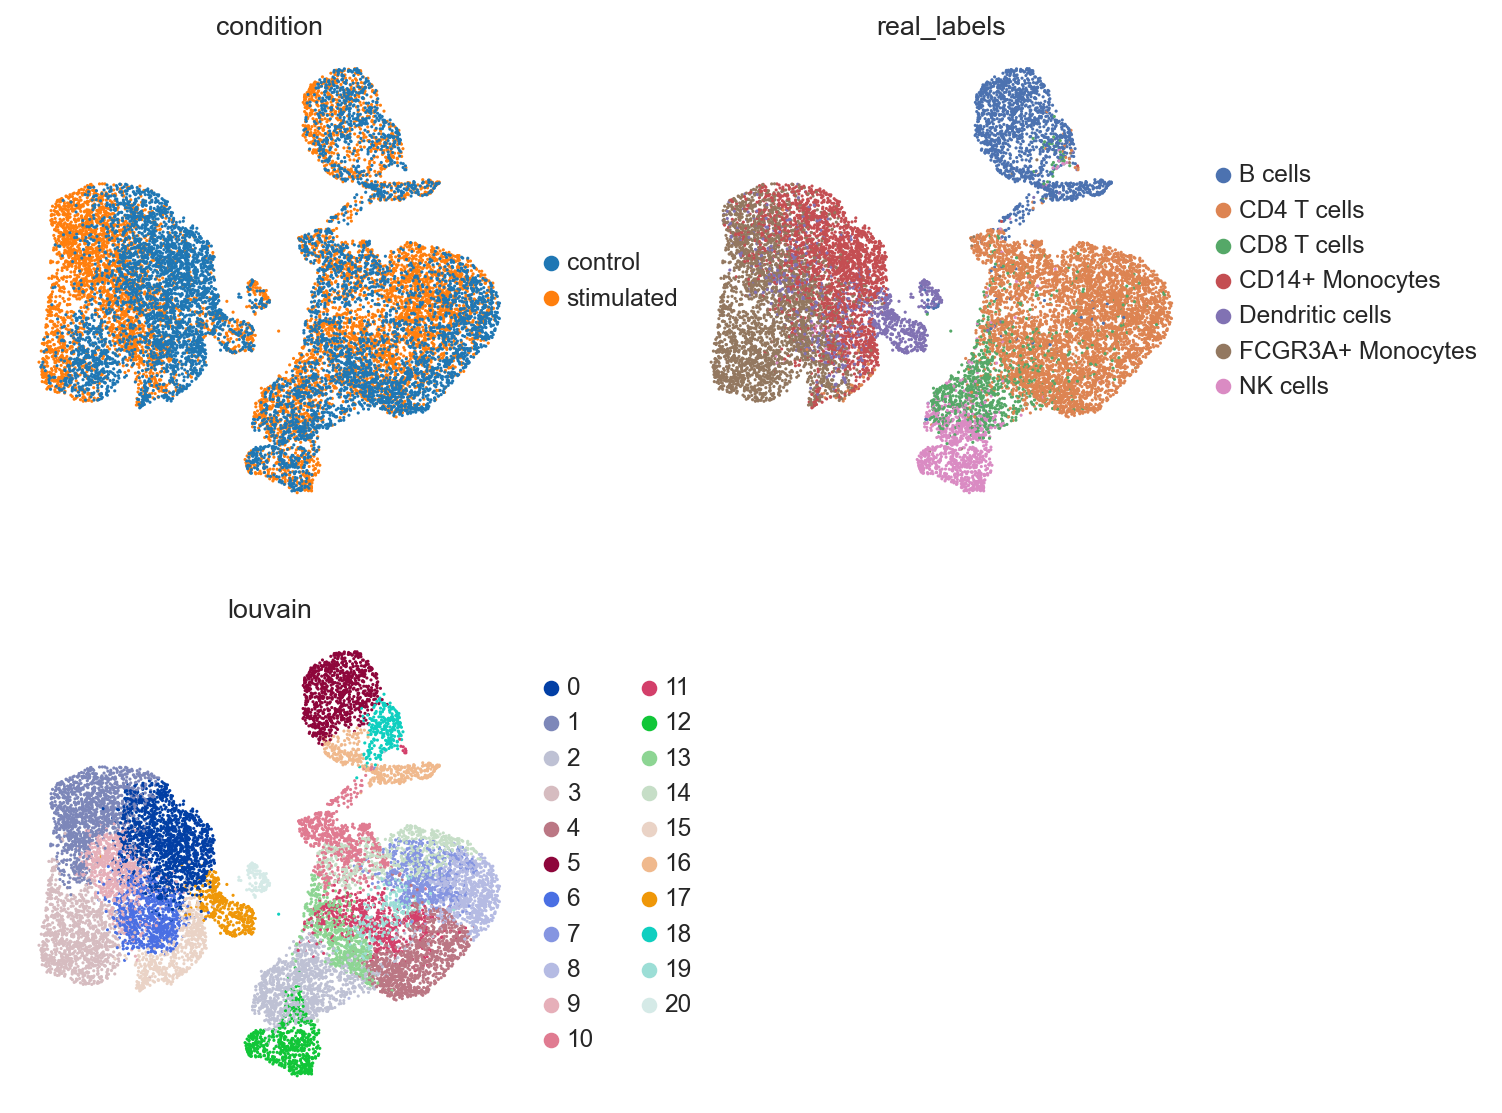

In [86]:
output = model(data, cond1=conditions )
adata.obsm["z"] = output["z"].detach().numpy()
adata.obsm["mu_z"] = output["mu_z"].detach().numpy()
adata.obs["real_labels"] = enc_labels.inverse_transform(
        labels.argmax(-1))
#sc.pp.neighbors(adata,use_rep="z")
sc.pp.neighbors(adata,use_rep="mu_z")
sc.tl.umap(adata, )
sc.tl.louvain(adata,)
sc.pl.umap(adata, 
           color=[
               "condition",
               "real_labels",
               "louvain",
               #"predict",
           ], 
        frameon=False,
        ncols=2,
        )


In [87]:
cd4Marker_d = ddata.obs["cell_type"] == "CD4 T cells"
model.cpu()
model.eval()
simOutput = model(
    input=z_data[cd4Marker_d],
    y=z_labels[cd4Marker_d],
    cond1=1-z_conditions[cd4Marker_d],
)

In [88]:
xdata = adata[adata.obs["cell_type"] == "CD4 T cells"].copy()
ydata = ddata[ddata.obs["cell_type"] == "CD4 T cells"].copy()
ydata.obs["condition"] = ["sim_stim"]*ydata.n_obs
yydata = ddata[ddata.obs["cell_type"] == "CD4 T cells"].copy()
yydata.obs["condition"] = ["ctrl_real"]*yydata.n_obs
ydata.X = simOutput['rec'].detach().abs().numpy()
ydata.obsm["z"] = simOutput["z"].detach().numpy()
#ydata.obsm["mu_z"] = simOutput["mu_z"].detach().numpy()
zdata = ad.concat([xdata, ydata, yydata], label="set", join="inner",)
np.unique(
    zdata.obs["condition"]
)


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


array(['control', 'ctrl_real', 'sim_stim', 'stimulated'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


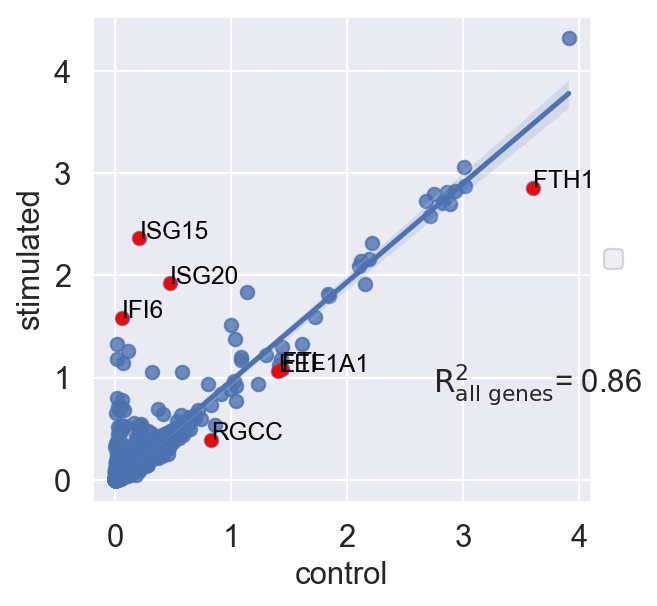

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


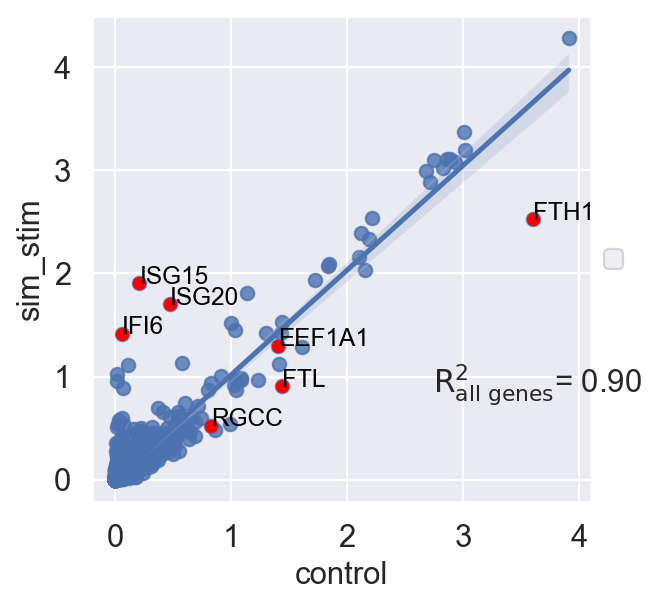

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


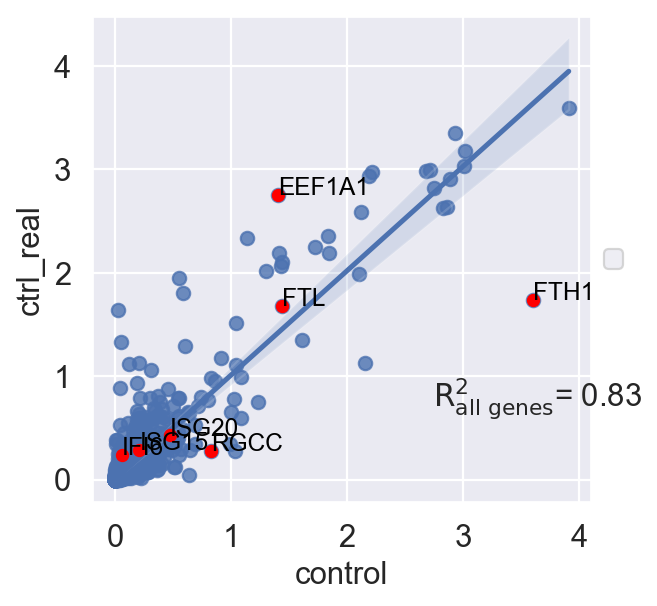

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


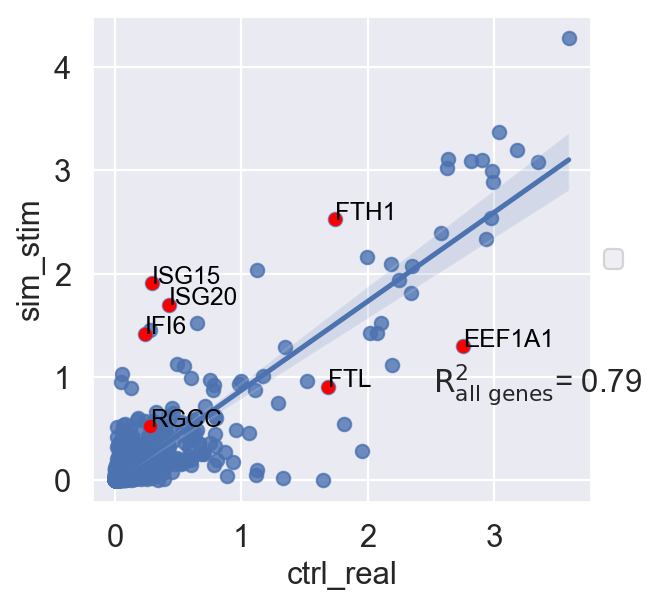

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


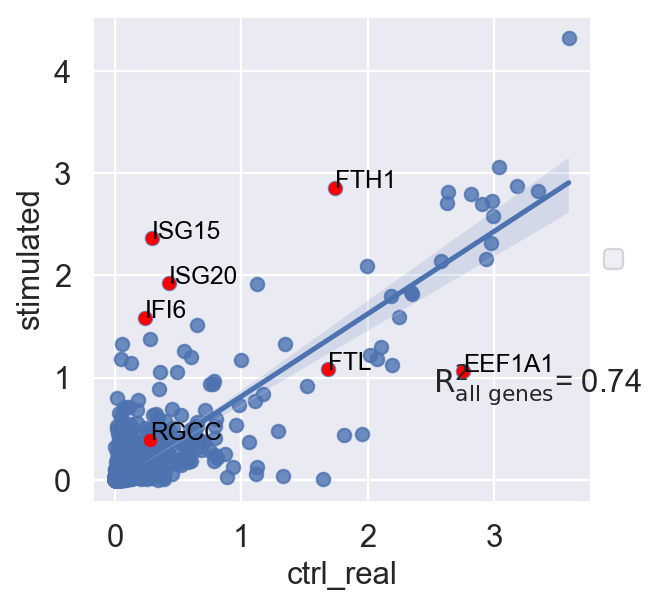

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


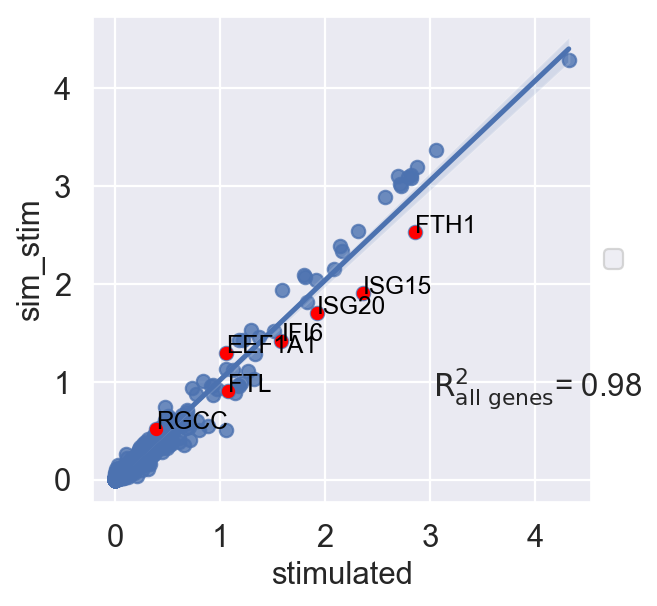

0.9774649081939525

In [89]:
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "control", "y" : "stimulated"},
                 labels={"x" : "control", "y" : "stimulated"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "control", "y" : "sim_stim"},
                 labels={"x" : "control", "y" : "sim_stim"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "control", "y" : "ctrl_real"},
                 labels={"x" : "control", "y" : "ctrl_real"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "ctrl_real", "y" : "sim_stim"},
                 labels={"x" : "ctrl_real", "y" : "sim_stim"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "ctrl_real", "y" : "stimulated"},
                 labels={"x" : "ctrl_real", "y" : "stimulated"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "stimulated", "y" : "sim_stim"},
                 labels={"x" : "stimulated", "y" : "sim_stim"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )

In [91]:
FMarker_d = ddata.obs["cell_type"] == "FCGR3A+ Monocytes"
model.cpu()
model.eval()
simOutput = model(
    input=z_data[FMarker_d],
    y=z_labels[FMarker_d],
    cond1=1-z_conditions[FMarker_d],
)
FMarker_d.sum()

xdata = adata[adata.obs["cell_type"] == "FCGR3A+ Monocytes"].copy()
ydata = ddata[ddata.obs["cell_type"] == "FCGR3A+ Monocytes"].copy()
ydata.obs["condition"] = ["sim_stim"]*ydata.n_obs
yydata = ddata[ddata.obs["cell_type"] == "FCGR3A+ Monocytes"].copy()
yydata.obs["condition"] = ["ctrl_real"]*yydata.n_obs
ydata.X = simOutput['rec'].detach().abs().numpy()
ydata.obsm["z"] = simOutput["z"].detach().numpy()
ydata.obsm["mu_z"] = simOutput["mu_z"].detach().numpy()
zdata = ad.concat([xdata, ydata, yydata], label="set", join="inner",)
np.unique(
    zdata.obs["condition"]
)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


array(['control', 'ctrl_real', 'sim_stim', 'stimulated'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


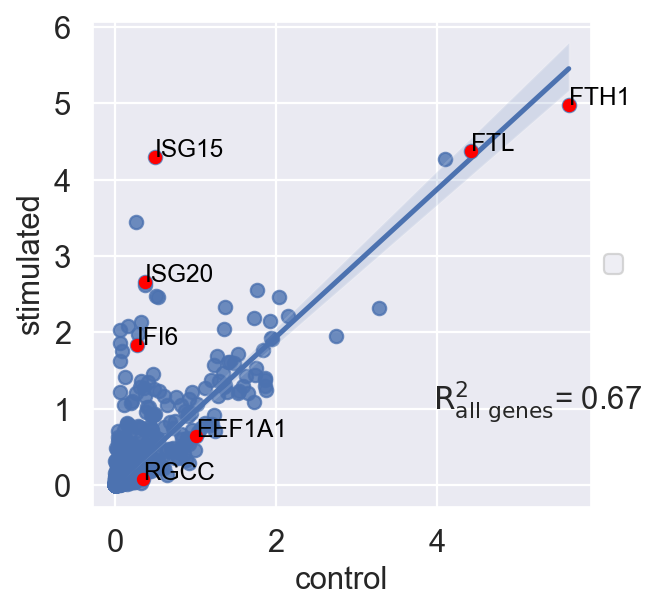

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


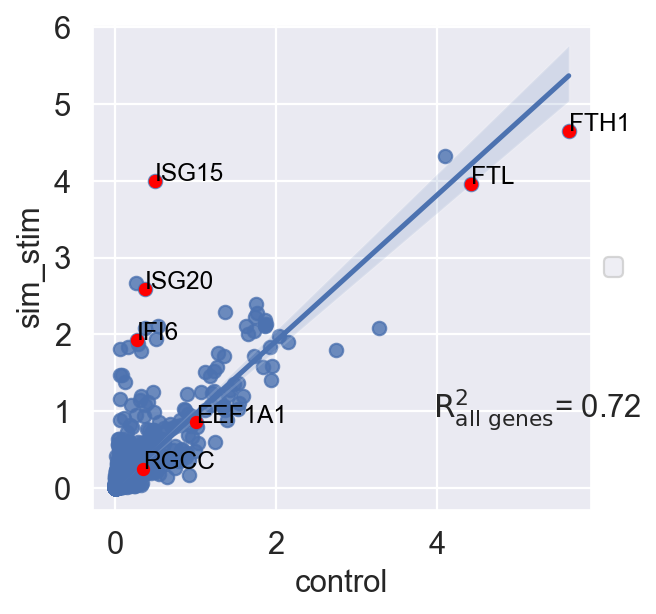

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


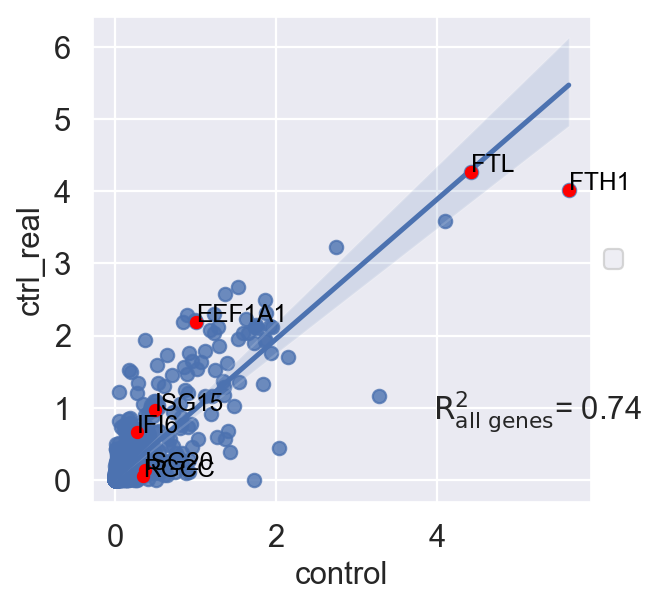

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


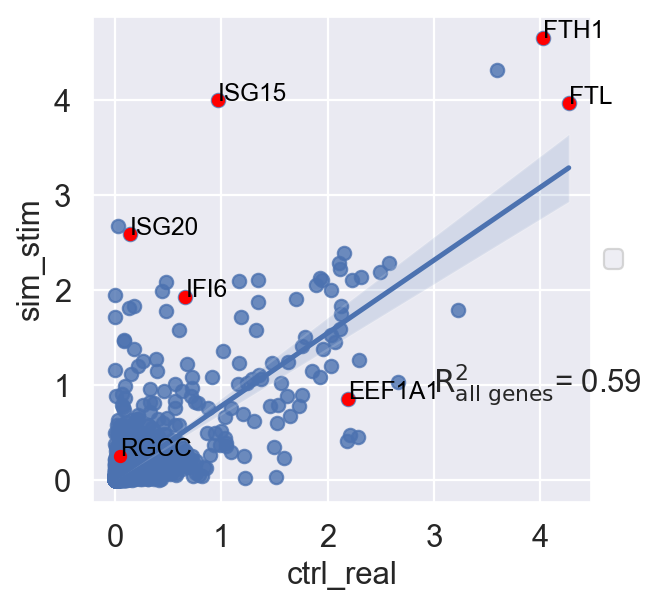

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


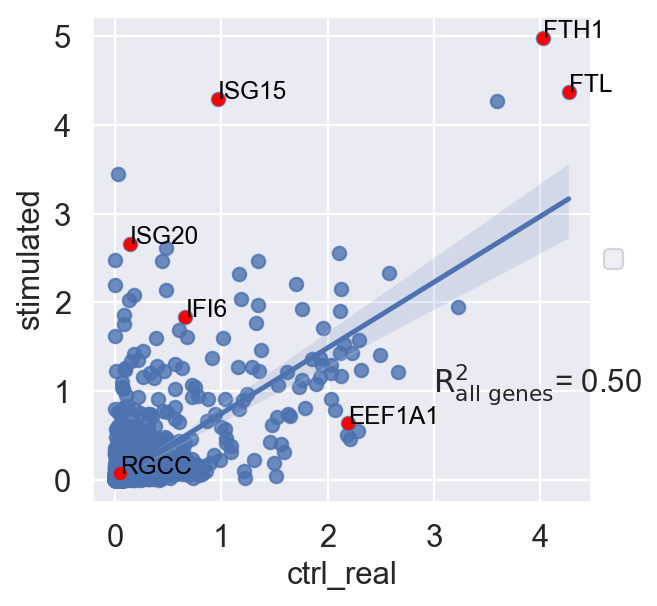

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


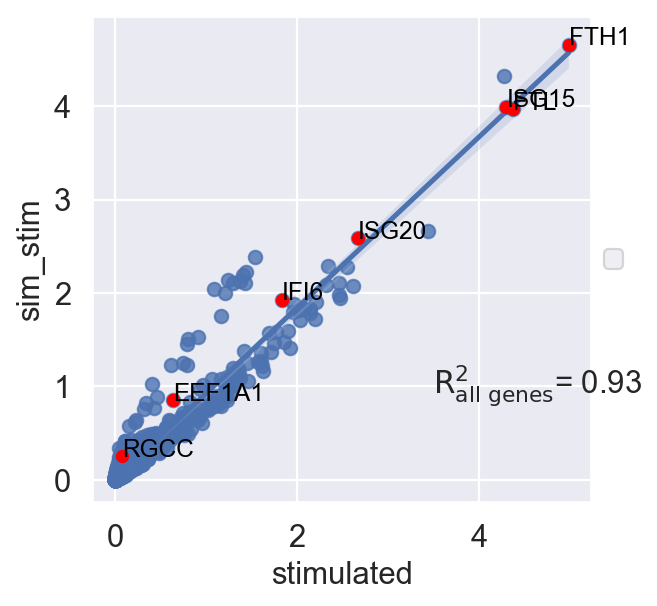

0.9336005746876689

In [92]:
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "control", "y" : "stimulated"},
                 labels={"x" : "control", "y" : "stimulated"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "control", "y" : "sim_stim"},
                 labels={"x" : "control", "y" : "sim_stim"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "control", "y" : "ctrl_real"},
                 labels={"x" : "control", "y" : "ctrl_real"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "ctrl_real", "y" : "sim_stim"},
                 labels={"x" : "ctrl_real", "y" : "sim_stim"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "ctrl_real", "y" : "stimulated"},
                 labels={"x" : "ctrl_real", "y" : "stimulated"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )
ut.reg_mean_plot(zdata, show=True, condition_key="condition",
                 axis_keys={"x" : "stimulated", "y" : "sim_stim"},
                 labels={"x" : "stimulated", "y" : "sim_stim"},
                 gene_list=["FTH1", "RGCC","EEF1A1","FTL","IFI6", "ISG20", "ISG15",],
                 #save="Kang_reg_ctrl_resp.png",
                )


In [93]:
ut.saveModelParameters(
        model,
        "./results/Kang_B1601C_" + ut.timeStamp() + "_model_params.pt",
        method="json",
        )
torch.save(
        model.state_dict(),
        "./results/Kang_B1601C_" + ut.timeStamp() + "_model_state.pt",
        )